In [1]:
#import pandas as pd
#import numpy as np
#import tensorflow as tf
#from tensorflow.keras.callbacks import Callback
#from tensorflow.keras.layers import Dense, Input, Flatten
#from tensorflow.keras import Sequential
#from tensorflow.keras.initializers import RandomNormal, RandomUniform
#import matplotlib.pyplot as plt
#from sklearn.datasets import make_circles, make_moons
#from sklearn.metrics import accuracy_score
#import tensorflow.keras.backend as K
#import tensorflow.keras as keras
#from collections import Counter
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.layers import Dense, Input, Flatten, concatenate, Dropout, Lambda, BatchNormalization
#from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.layers import InputLayer
#from tensorflow.keras.metrics import Accuracy 

#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split

In [2]:
import neptune.new as neptune
myProject = 'aligator/RNN'
project = neptune.init(api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIzOTM1NWZiMC05OTkwLTRlNmQtOTcxMi05ODc5NWIwZGRiMTkifQ==",
                        project=myProject) 
project.stop()


/tmp/ipykernel_35743/2768557309.py:3: NeptuneDeprecationWarning: `init` is deprecated, use `init_run` instead. We'll end support of it in `neptune-client==1.0.0`.
  project = neptune.init(api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIzOTM1NWZiMC05OTkwLTRlNmQtOTcxMi05ODc5NWIwZGRiMTkifQ==",


https://app.neptune.ai/aligator/RNN/e/RNN-9


Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs.neptune.ai/help/nvml_error/


Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 9 operations to synchronize with Neptune. Do not kill this process.
All 9 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/aligator/RNN/e/RNN-9


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import LSTM, GRU, SimpleRNN
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam

2022-12-24 03:30:33.619395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-24 03:30:33.749962: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-24 03:30:33.755663: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-24 03:30:33.755678: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [4]:


max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print("Loading data...")
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Example:')
print(X_train[:1])

print("Pad sequences (samples x time)")
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)



Loading data...
25000 train sequences
25000 test sequences
Example:
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 1

In [5]:
def getBatchGradWgts(grads, wgts, lossVal, 
                      gradHist, lossHist, wgtsHist, 
                      recordWeight=True, npt_exp=None):
    dataGrad, dataWeight = {}, {}
    
    for wgt, grad in zip(wgts, grads):
        if '/kernel:' not in wgt.name:
            continue 
        layerName = wgt.name.split("/")[0]         
        dataGrad[layerName] = grad.numpy()
        dataWeight[layerName] = wgt.numpy()
        ## Log in Neptune
        if npt_exp:
            npt_exp[f'MeanGrads{layerName.upper()}'].log(np.mean(grad.numpy()))   
            npt_exp[f'MeanWgtBatch{layerName.upper()}'].log(np.mean(wgt.numpy()))         
        
    gradHist.append(dataGrad)
    lossHist.append(lossVal.numpy())
    if recordWeight:
        wgtsHist.append(dataWeight)           
                
                
def fitModel(X, y, model, optimizer, 
              n_epochs=1, curBatch_size=batch_size,
              npt_exp=None):
    
    lossFunc = tf.keras.losses.BinaryCrossentropy()
    #lossFunc = tf.keras.losses.MeanSquaredError()
        
    subData = tf.data.Dataset.from_tensor_slices((X, y))
    subData = subData.shuffle(buffer_size=42).batch(curBatch_size)
   
    gradHist, lossHist, wgtsHist = [], [], []                    
    
    for epoch in range(n_epochs):
        print(f'== Starting epoch {epoch} ==')        
        for step, (x_batch, y_batch) in enumerate(subData):
            with tf.GradientTape() as tape:
                yPred = model(x_batch, training=True)
                lossVal = lossFunc(y_batch, yPred)
                
            grads = tape.gradient(lossVal, model.trainable_weights)
            wgts = model.trainable_weights
            optimizer.apply_gradients(zip(grads, model.trainable_weights))           
            
            if step == 5:
                getBatchGradWgts(gradHist=gradHist, lossHist=lossHist, wgtsHist=wgtsHist, 
                                  grads=grads, wgts=wgts, lossVal=lossVal, npt_exp=npt_exp) 
                if npt_exp:
                    npt_exp['BatchLoss'].log(lossVal)   
                    
    getBatchGradWgts(gradHist=gradHist, lossHist=lossHist, wgtsHist=wgtsHist, 
                      grads=grads, wgts=wgts, lossVal=lossVal, npt_exp=npt_exp)    
    return gradHist, lossHist, wgtsHist



def gradientsVis(curGradHist, curLossHist, modelName):    
    fig, ax = plt.subplots(1, 1, sharex=True, constrained_layout=True, figsize=(7,5))
    ax.set_title(f"Mean gradient Simple RNN")
    for layer in curGradHist[0]:
        ax.plot(range(len(curGradHist)), [gradList[layer].mean() for gradList in curGradHist], label=f'Layer_{layer.upper()}')
    ax.legend()
    return fig


https://app.neptune.ai/aligator/RNN/e/RNN-10
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Build model...
Train...
== Starting epoch 0 ==


2022-12-24 03:30:38.661804: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-24 03:30:38.661834: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-24 03:30:38.661862: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (archlinux): /proc/driver/nvidia/version does not exist
2022-12-24 03:30:38.662223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 8 operations to synchronize with Neptune. Do not kill this process.
All 8 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/aligator/RNN/e/RNN-10


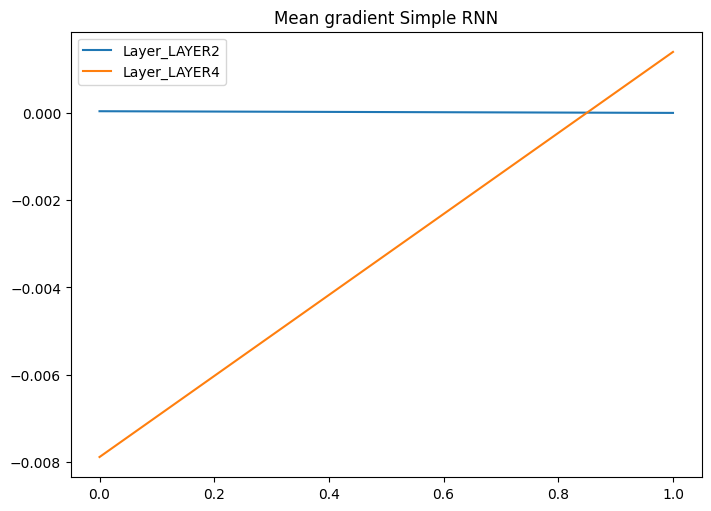

In [6]:
from neptune.new.integrations.tensorflow_keras import NeptuneCallback
npt_exp = neptune.init(    
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIzOTM1NWZiMC05OTkwLTRlNmQtOTcxMi05ODc5NWIwZGRiMTkifQ==",
    project=myProject, 
    name='SimpleRNN', 
    tags=['vanishingGradients'])
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen,name="layer1"))
model.add(SimpleRNN(128, name="layer2"))  
model.add(Dropout(0.5, name="layer3"))
model.add(Dense(1,name="layer4"))
model.add(Activation('sigmoid', name="layer5"))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam')
opt = Adam(learning_rate=0.01)
print("Train...")
#model.fit(X_train, y_train, batch_size=batch_size, epochs=1, 
          #validation_data=(X_test, y_test))
curGradHist, curLossHist, curWgtHist = fitModel(X_test, y_test, model, optimizer=opt, npt_exp=npt_exp)
npt_exp['Comparing All Layers'].upload(neptune.types.File.as_image(gradientsVis(curGradHist, curLossHist, 
                                                                                    modelName='Sigmoid_Raw')))
npt_exp.stop()